In [1]:
import tensorflow as tf
import torch


In [2]:
### install requirements ###

!pip install --upgrade diffusers[torch]
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 73.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 102.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.1/330.1 kB 68.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.0/280.0 kB 65.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.9/170.9 kB 50.2 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.1.0
    Uninstalling fsspec-2023.1.0:
      Successfully uninstalled fsspec-2023.1.0
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.12.0
    Uninstalling huggingface-hub-0.12.0:
      Successfully uninstalled huggingface-hub-0.12.0


In [2]:
# device = torch.device("cuda" if use_cuda else "cpu")
# print("Device: ",device)

In [2]:
if torch.cuda.is_available():
    device = torch.device('cuda')
    
else:
    device = torch.device('cpu')
    
print("using", device, "device")

using cuda device


In [3]:
if device:
    print('__CUDA VERSION:', torch.backends.cudnn.version())
    print('__Number CUDA Devices:', torch.cuda.device_count())
    print('__CUDA Device Name:',torch.cuda.get_device_name(0))
    print('__CUDA Device Total Memory [GB]:',torch.cuda.get_device_properties(0).total_memory/1e9)

__CUDA VERSION: 8302
__Number CUDA Devices: 1
__CUDA Device Name: NVIDIA RTX A4000
__CUDA Device Total Memory [GB]: 16.89124864


In [11]:
import time

matrix_size = 43*15

# create random matrix
x = torch.randn(matrix_size, matrix_size)
y = torch.randn(matrix_size, matrix_size)

print("######## CPU SPEED ##########")
start = time.time()
result = torch.div(x,y)

print(time.time() - start)
print("verify device:", result.device)

x_gpu = x.to(device)
y_gpu = y.to(device)
torch.cuda.synchronize()


for i in range(5):
    print("######## GPU SPEED ##########")
    start = time.time()
    result_gpu = torch.div(x_gpu,y_gpu)
    print(time.time() - start)
    print("verify device:", result_gpu.device)



######## CPU SPEED ##########
0.008465766906738281
verify device: cpu
######## GPU SPEED ##########
5.030632019042969e-05
verify device: cuda:0
######## GPU SPEED ##########
1.0251998901367188e-05
verify device: cuda:0
######## GPU SPEED ##########
8.106231689453125e-06
verify device: cuda:0
######## GPU SPEED ##########
7.3909759521484375e-06
verify device: cuda:0
######## GPU SPEED ##########
7.152557373046875e-06
verify device: cuda:0


In [7]:
x_gpu

tensor([[ 0.1569,  0.6587, -0.3171,  ..., -0.2733,  0.0842,  0.1218],
        [-0.7752,  1.5033, -0.3462,  ..., -0.1565, -0.7386,  1.5053],
        [-1.2346, -0.4608, -0.7210,  ..., -0.9082, -0.9798,  1.3685],
        ...,
        [-0.8750,  0.1492,  1.6953,  ...,  0.6158, -0.5740,  0.4127],
        [ 0.8285,  1.3634,  0.0868,  ...,  0.4279, -0.0622,  1.2310],
        [ 0.2224, -0.3242,  1.1347,  ...,  0.9905, -0.3822,  0.8671]],
       device='cuda:0')

In [3]:
!pip install --upgrade diffusers transformers scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 86.2 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.5/38.5 MB 46.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 118.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.9.2
    Uninstalling scipy-1.9.2:
      Successfully uninstalled scipy-1.9.2
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.12.1
    Uninstalling tokenizers-0.12.1:
      Successfully uninstalled tokenizers-0.12.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.21.3
    Uninstalling transformers-4.21.3:
      Successfully uninstalled transformers-4.21.3


In [3]:
!pip install --quiet ipyplot


In [4]:
import torch
from torch import autocast
from diffusers import StableDiffusionPipeline
import ipyplot


model_id = "CompVis/stable-diffusion-v1-1"
device = "cuda"

In [5]:
pipe = StableDiffusionPipeline.from_pretrained(model_id)
pipe = pipe.to(device)

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors not found


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/288 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/731 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/942 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/704 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.bin:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [6]:
prompt = "a photo of an astronaut riding a horse on mars"

  0%|          | 0/50 [00:00<?, ?it/s]

In [9]:
image = pipe(prompt=prompt).images[0]


  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.9/dist-packages/ipyplot/_utils.py:95: FutureWarning: The input object of type 'Image' is an array-like implementing one of the corresponding protocols (`__array__`, `__array_interface__` or `__array_struct__`); but not a sequence (or 0-D). In the future, this object will be coerced as if it was first converted using `np.array(obj)`. To retain the old behaviour, you have to either modify the type 'Image', or assign to an empty array created with `np.empty(correct_shape, dtype=object)`.
  return np.asarray(seq, dtype=type(seq[0]))



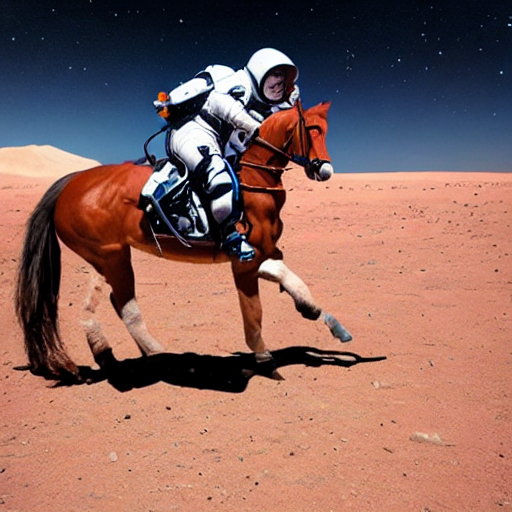


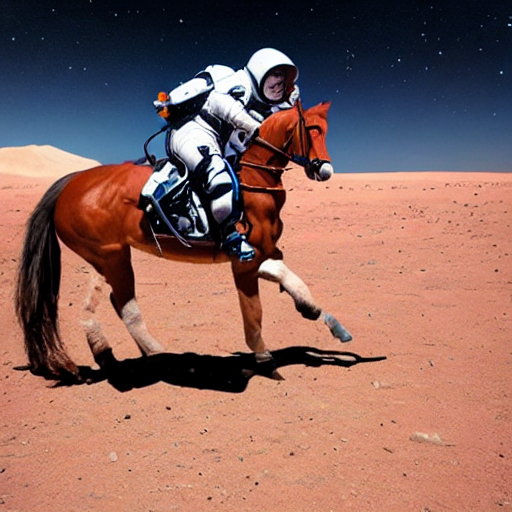

In [12]:
ipyplot.plot_images([image],img_width=400)


In [25]:
import random
import os
import time

import matplotlib.pyplot as plt

In [27]:
os.makedirs('/notebooks/happy', exist_ok=True)
os.makedirs('/notebooks/sad', exist_ok=True)
os.makedirs('/notebooks/angry', exist_ok=True)
os.makedirs('/notebooks/surprised', exist_ok=True)
os.makedirs('/notebooks/lonely', exist_ok=True)

In [26]:
ethnicities = ['a han Chinese', 'a maasai', 'a inuit', 'a bengali', 'a zulu', 'a ashkenazi Jewish']
genders = ['male', 'female']
emotion_prompts = {'happy': 'smiling',
                   'surprised': 'surprised, opened mouth, raised eyebrows',
                   'sad': 'frowning, sad face expression, crying',
                   'angry': 'angry, fierce, irritated',
                  'lonely': 'lonely, alone, lonesome'}

print("######## CPU SPEED ##########")
start = time.time()
for j in range(10):
    for emotion in emotion_prompts.keys():
        
        emotion_prompt = emotion_prompts[emotion]
    
        ethnicity = random.choice(ethnicities)
        gender = random.choice(genders)
    
        prompt = 'Medium-shot portrait of {} {}, {}, front view, looking at the camera, color photography, '.format(ethnicity, gender, emotion_prompt) + \
            'photorealistic, hyperrealistic, realistic, incredibly detailed, crisp focus, digital art, depth of field, 50mm, 8k'
        negative_prompt = '3d, cartoon, anime, sketches, (worst quality:2), (low quality:2), (normal quality:2), lowres, normal quality, ((monochrome)), ' + \
                      '((grayscale)) Low Quality, Worst Quality, plastic, fake, disfigured, deformed, blurry, bad anatomy, blurred, watermark, grainy, signature'

        image = pipe(prompt=prompt, negative_prompt=negative_prompt).images[0]
        image.save('/notebooks/{}/{}.png'.format(emotion, str(j).zfill(4)))
print(time.time() - start)


######## CPU SPEED ##########


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

483.6277093887329
